In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
model_name = "STREAM+GEMM"

In [3]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [4]:
gpa_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,849143,0,6.496405,6.496405,0.000000,0.000000
1,1,361254,487889,15.270079,8.773673,0.088444,0.088444
2,2,214976,146278,25.660432,10.390353,0.141478,0.053034
3,3,139286,75690,39.604677,13.944245,0.182641,0.041163
4,4,99303,39983,55.550960,15.946283,0.211633,0.028992
5,5,77804,21499,70.900943,15.349983,0.231120,0.019487
6,6,65202,12602,84.604414,13.703471,0.244826,0.013707
7,7,57228,7974,96.392972,11.788558,0.254945,0.010119
8,8,51686,5542,106.728650,10.335678,0.262982,0.008037
9,9,47468,4218,116.212543,9.483893,0.269864,0.006882


In [5]:
rip_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,67054,0,82.267680,82.267680,0.000000,0.000000
1,1,16021,51033,344.321640,262.053961,0.009251,0.009251
2,2,9780,6241,564.046728,219.725088,0.011514,0.002263
3,3,7422,2358,743.246699,179.199971,0.012796,0.001282
4,4,6033,1389,914.367147,171.120448,0.013804,0.001007
5,5,5152,881,1070.725349,156.358202,0.014602,0.000799
6,6,4500,652,1225.861556,155.136206,0.015311,0.000709
7,7,3956,544,1394.433013,168.571458,0.016002,0.000690
8,8,3515,441,1569.381792,174.948779,0.016641,0.000640
9,9,3190,325,1729.271787,159.889995,0.017171,0.000530


In [10]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])

    # target_1 = "p"
    # target_1 = "p'"
    target_1 = "ratio'"
    target_2 = "upper limit for train/val accuracy"
    # target_2 = "accuracy'"
    
    color_1 = 'tab:red'
    ax_1.set_ylabel(target_1, color=color_1)
    ax_1.plot(df["threshold"], df[target_1], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel(target_2, color=color_2)
    ax_2.plot(df["threshold"], df[target_2], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    plt.show()

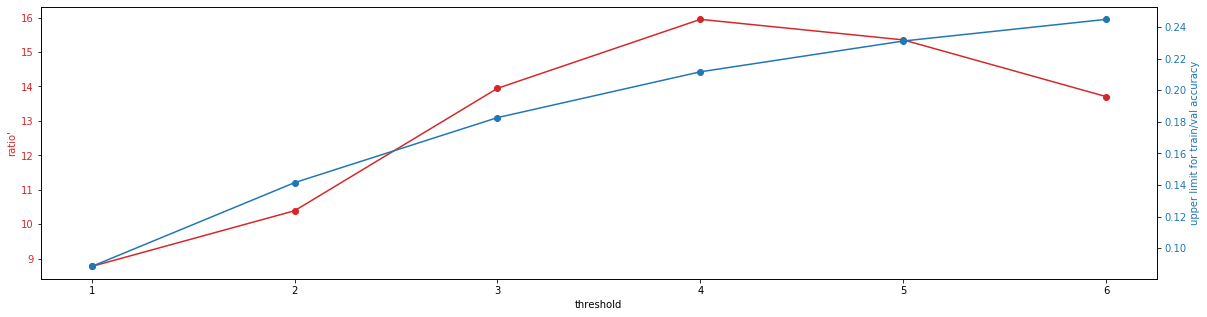

In [11]:
analysis_visualize(gpa_analysis[1:7])

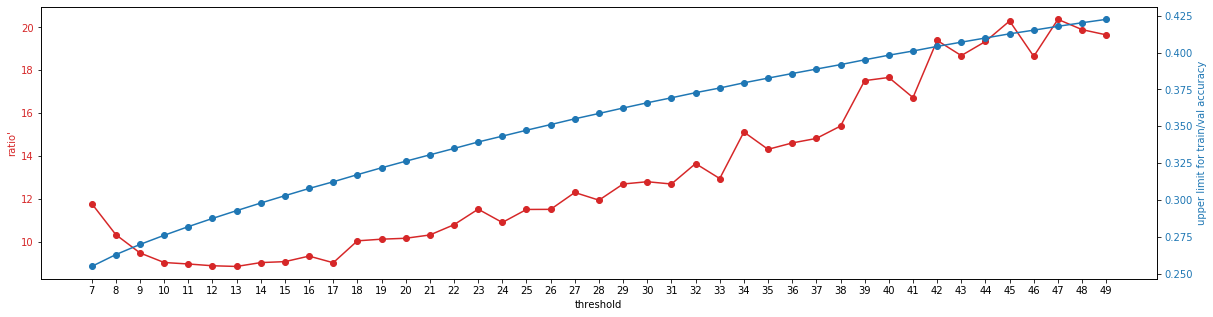

In [12]:
analysis_visualize(gpa_analysis[7:])

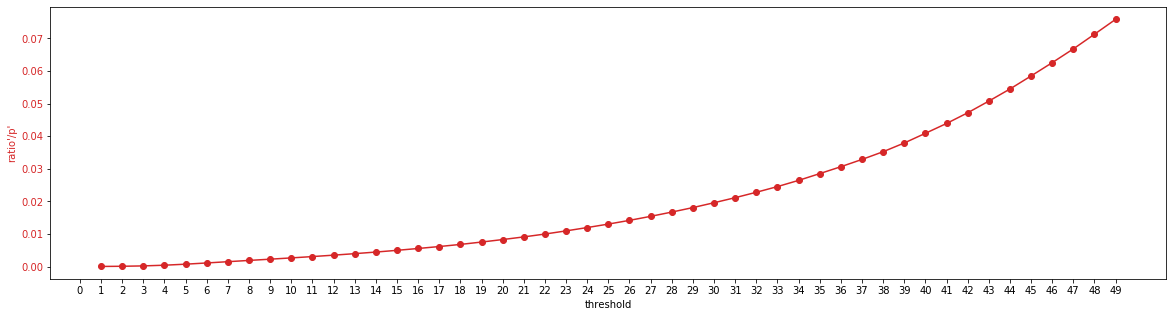

In [9]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio'/p'", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["ratio'"]/gpa_analysis["p'"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()

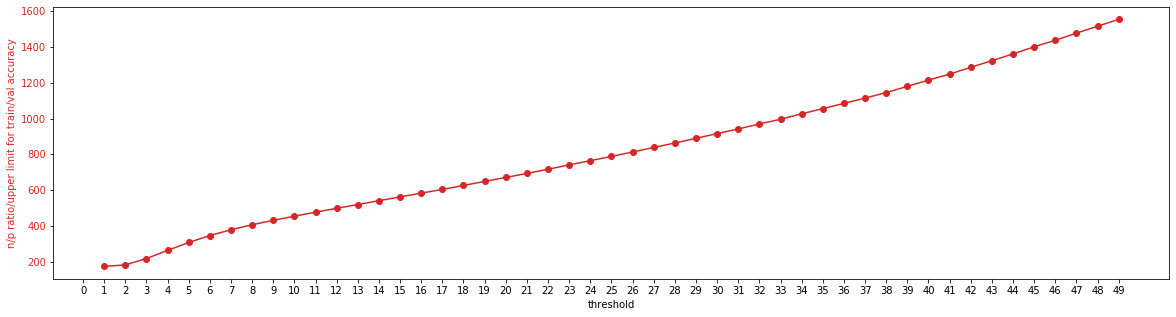

In [14]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("n/p ratio/upper limit for train/val accuracy", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["n/p ratio"]/gpa_analysis["upper limit for train/val accuracy"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()

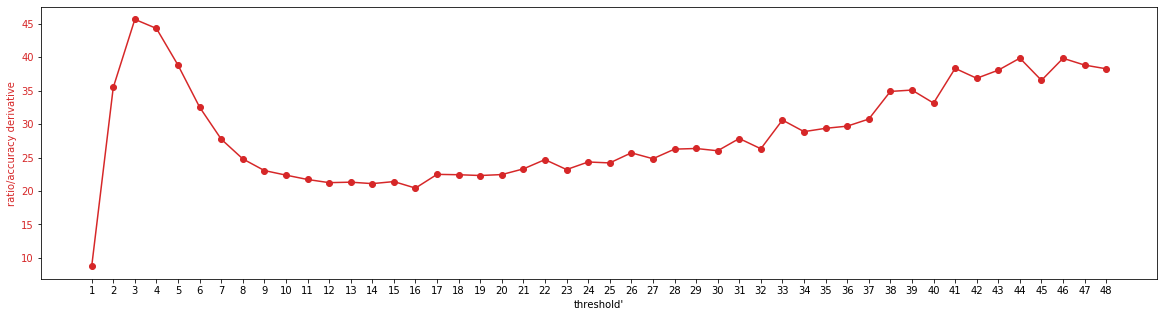

In [88]:
t = (gpa_analysis["n/p ratio"]/gpa_analysis["upper limit for train/val accuracy"])[1:].to_numpy()
# NOTE : If pd.Series has Index from non-1, Series.subtract() not works
derivative = t[1:] - t[:-1]

fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold'")
ax_1.set_xticks([i for i in range(1, 49)])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio/accuracy derivative", color=color_1)
ax_1.plot([i for i in range(1, 49)], derivative, "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()

In [89]:
derivative[44], derivative[46]

(36.529991972998005, 38.80925328260287)